#

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
carjackings_path = "data/Chi_Carjackings/Chicago_Carjackings.shp"
community_areas_path = "data/Chi-CCA/Chicago_2020.shp"
carjacking_variables_path = "data/Chi_Carjackings/carjacking_variables.xlsx"

In [3]:
# 加载劫车事件点数据（点要素）
gdf_carjackings = gpd.read_file(carjackings_path)

# 加载芝加哥社区区块数据（面要素）
gdf_community_areas = gpd.read_file(community_areas_path)

In [4]:
df_carjacking_vars = pd.read_excel(carjacking_variables_path)

In [5]:
# 查看劫车数据结构
print(gdf_carjackings.head())
print(gdf_carjackings.info())

# 查看社区数据结构
print(gdf_community_areas.head())
print(gdf_community_areas.info())

# 查看变量表数据结构
print(df_carjacking_vars.head())
print(df_carjacking_vars.info())


           ID Case _mber                    Date   IUCR  \
0  12243012.0   JD456735  12/11/2020 11:45:00 PM  326.0   
1  12130750.0   JD326543  08/09/2020 08:30:00 PM  326.0   
2  12012068.0   JD189121  03/18/2020 12:03:00 AM  326.0   
3  12012705.0   JD189547  03/18/2020 01:00:00 PM  326.0   
4  12013533.0   JD189766  03/18/2020 05:32:00 PM  325.0   

                       Descr_tion   Locat_tion    Beat  District  Ward  \
0  AGGRAVATED VEHICULAR HIJACKING       STREET   723.0       7.0   6.0   
1  AGGRAVATED VEHICULAR HIJACKING  GAS STATION  1234.0      12.0  25.0   
2  AGGRAVATED VEHICULAR HIJACKING       STREET  1114.0      11.0  28.0   
3  AGGRAVATED VEHICULAR HIJACKING       STREET  1114.0      11.0  28.0   
4             VEHICULAR HIJACKING       STREET   712.0       7.0  16.0   

   Commu_Area  FBI Code  X Coo_nate  Y Coo_nate   Latitude  Longitude  \
0        68.0       3.0   1171154.0   1859576.0  41.770145 -87.648175   
1        31.0       3.0   1160694.0   1889888.0  41.85

In [6]:
# 查看坐标参考系(CRS)
print("Carjackings CRS:", gdf_carjackings.crs)
print("Community Areas CRS:", gdf_community_areas.crs)

# 如果二者不一致，可以将其中一个数据集重投影到另一个的CRS，例如：
# gdf_carjackings = gdf_carjackings.to_crs(gdf_community_areas.crs)

# 查看缺失值情况
print("\nMissing values in carjackings data:")
print(gdf_carjackings.isnull().sum())

print("\nMissing values in community areas data:")
print(gdf_community_areas.isnull().sum())

# 检查几何对象类型
print("\nCarjackings geometry type:", gdf_carjackings.geom_type.unique())
print("Community Areas geometry type:", gdf_community_areas.geom_type.unique())

# 确保坐标存在且有效
valid_carjackings = gdf_carjackings[gdf_carjackings.geometry.notnull()]
print("\nNumber of valid carjacking points:", len(valid_carjackings))
print("Number of all carjacking points:", len(gdf_carjackings))

# 如果需要的话，还可以检查坐标范围，以确保数据大致在芝加哥范围内
print("\nCarjackings bounding box:", gdf_carjackings.total_bounds)
print("Community Areas bounding box:", gdf_community_areas.total_bounds)


Carjackings CRS: EPSG:3435
Community Areas CRS: GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

Missing values in carjackings data:
ID            0
Case _mber    0
Date          0
IUCR          0
Descr_tion    0
Locat_tion    0
Beat          0
District      0
Ward          0
Commu_Area    0
FBI Code      0
X Coo_nate    0
Y Coo_nate    0
Latitude      0
Longitude     0
geometry      0
dtype: int64

Missing values in community areas data:
area_num_1    0
area_numbe    0
community     0
shape_area    0
shape_len     0
             ..
2000_HISP     0
2000_BLACK    0
2000_ASIAN    0
2000_OTHER    0
geometry      0
Length: 217, dtype: int64

Carjackings geometry type: ['Point']
Community Areas geometry type: ['Polygon' 'MultiPolygon']

Number of valid carjacking points: 1412
Number of all carjacking points: 1412

In [7]:
# 将Community Areas数据重投影为EPSG:3435
gdf_community_areas = gdf_community_areas.to_crs(epsg=3435)

# 检查结果
print(gdf_community_areas.crs)

EPSG:3435

In [8]:
# 使用sjoin进行空间连接
# how='left'：保留carjackings中的所有点，from='carjackings'中返回其所属的community polygons
# op='within'或'op='intersects'：由于点位于面内，所以可使用'within'匹配事件所在社区
gdf_carjackings_joined = gpd.sjoin(gdf_carjackings, gdf_community_areas, how='left', predicate='within')

# 检查结果
print(gdf_carjackings_joined.head())
print(gdf_carjackings_joined.crs)


           ID Case _mber                    Date   IUCR  \
0  12243012.0   JD456735  12/11/2020 11:45:00 PM  326.0   
1  12130750.0   JD326543  08/09/2020 08:30:00 PM  326.0   
2  12012068.0   JD189121  03/18/2020 12:03:00 AM  326.0   
3  12012705.0   JD189547  03/18/2020 01:00:00 PM  326.0   
4  12013533.0   JD189766  03/18/2020 05:32:00 PM  325.0   

                       Descr_tion   Locat_tion    Beat  District  Ward  \
0  AGGRAVATED VEHICULAR HIJACKING       STREET   723.0       7.0   6.0   
1  AGGRAVATED VEHICULAR HIJACKING  GAS STATION  1234.0      12.0  25.0   
2  AGGRAVATED VEHICULAR HIJACKING       STREET  1114.0      11.0  28.0   
3  AGGRAVATED VEHICULAR HIJACKING       STREET  1114.0      11.0  28.0   
4             VEHICULAR HIJACKING       STREET   712.0       7.0  16.0   

   Commu_Area  ...  ARABIC  KOREAN  OTHASIAN  OTHER_EURO  OTHUNSPEC  \
0        68.0  ...     0.0     0.0       1.0        76.0      170.0   
1        31.0  ...   203.0   186.0     136.0       256.0  

In [9]:
# 查看社区数据中的所有列名，找到中位收入字段名
print(gdf_community_areas.columns)
gdf_community_areas['MEDINC'].describe()
median_income = gdf_community_areas['MEDINC'].median()
print("Median income for all communities:", median_income)
gdf_community_areas['income_group'] = gdf_community_areas['MEDINC'].apply(lambda x: 'low' if x < median_income else 'high')
# 确保使用空间连接后的数据
# 按照社区唯一标识字段（例如area_numbe或area_num_1）对事件计数
# 注意替换'area_numbe'为实际标识社区的列名
event_counts = gdf_carjackings_joined.groupby('area_numbe').size().reset_index(name='carjackings_count')

# 将事件数合并回社区数据
gdf_community_areas = gdf_community_areas.merge(event_counts, on='area_numbe', how='left')

# 对于没有劫车事件的社区，填充为0
gdf_community_areas['carjackings_count'] = gdf_community_areas['carjackings_count'].fillna(0)
gdf_community_areas['area_sqm'] = gdf_community_areas.geometry.area
gdf_community_areas['carjackings_density'] = (gdf_community_areas['carjackings_count'] / (gdf_community_areas['area_sqm'] / 1_000_000))
print(gdf_community_areas[['area_numbe', 'MEDINC', 'income_group', 'carjackings_count', 'carjackings_density']].head())


Index(['area_num_1', 'area_numbe', 'community', 'shape_area', 'shape_len',
       'districtno', 'district', 'GEOID', 'GEOG', '2000_POP',
       ...
       'KOREAN', 'OTHASIAN', 'OTHER_EURO', 'OTHUNSPEC', '2000_WHITE',
       '2000_HISP', '2000_BLACK', '2000_ASIAN', '2000_OTHER', 'geometry'],
      dtype='object', length=217)
Median income for all communities: 51689.0
   area_numbe   MEDINC income_group  carjackings_count  carjackings_density
0        35.0  31856.0          low               20.0             0.434738
1        36.0  32844.0          low                4.0             0.236491
2        37.0  23148.0          low                9.0             0.451881
3        38.0  33503.0          low               31.0             0.639273
4        39.0  49114.0          low               11.0             0.378374

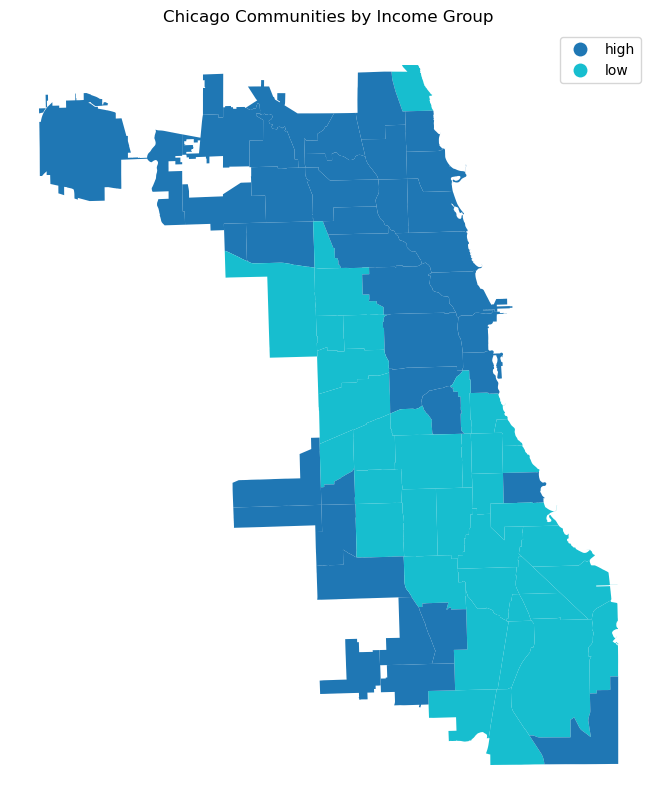

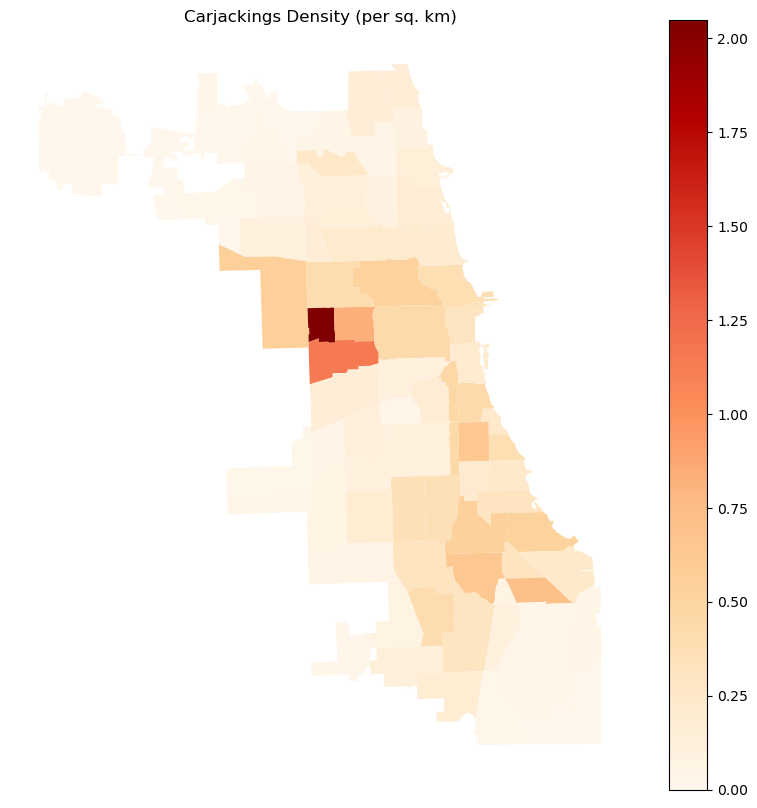

In [10]:
import matplotlib.pyplot as plt

# 可视化：根据income_group着色绘制社区分区
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_community_areas.plot(column='income_group', categorical=True, legend=True, ax=ax)
ax.set_title('Chicago Communities by Income Group')
ax.axis('off')
plt.show()

# 可视化：根据carjackings_density绘制社区分区（连续值专题图）
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_community_areas.plot(column='carjackings_density', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Carjackings Density (per sq. km)')
ax.axis('off')
plt.show()


In [ ]:
import folium
import geopandas as gpd

gdf_community_areas = gdf_community_areas.to_crs(epsg=4326)

mean_lat = gdf_community_areas.geometry.centroid.y.mean()
mean_lon = gdf_community_areas.geometry.centroid.x.mean()

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=gdf_community_areas,
    data=gdf_community_areas,
    columns=['community', 'carjackings_density'],
    key_on='feature.properties.community',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Carjackings Density (per sq. km)'
).add_to(m)

def style_function(feature):
    income_grp = feature['properties']['income_group']
    color = 'blue' if income_grp == 'high' else 'green'
    return {
        'fillOpacity': 0,  # 不改变填充(底色已由choropleth确定)
        'color': color,
        'weight': 2
    }

# 准备在GeoJson中显示的字段信息（弹出或鼠标悬停时显示）
# 例如显示 'community', 'MEDINC', 'carjackings_count', 'carjackings_density', 'income_group'
tooltip_fields = ['community', 'MEDINC', 'carjackings_count', 'carjackings_density', 'income_group']
tooltip_aliases = ['Community:', 'Median Income:', 'Carjacking Count:', 'Carjacking Density:', 'Income Group:']

# 使用GeoJson叠加社区边界线并添加tooltip
folium.GeoJson(
    gdf_community_areas,
    name='Income Group Boundaries',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=tooltip_fields,
        aliases=tooltip_aliases,
        localize=True
    )
).add_to(m)

m

C:\Users\huang\AppData\Local\Temp\ipykernel_8420\2462306573.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mean_lat = gdf_community_areas.geometry.centroid.y.mean()
C:\Users\huang\AppData\Local\Temp\ipykernel_8420\2462306573.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mean_lon = gdf_community_areas.geometry.centroid.x.mean()

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_552f21e0161d19db06f1366cb698bcb7 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_552f21e0161d19db06f1366cb698bcb7" ></div>
 
</body>
<script>
 
 
 var map_552f21e0161d19db06f1366cb698bcb7 = L.map(
 "map_552f21e0161d19db06f1366cb698bcb7",
 {
 center: [41.83939408268862, -87.6750499288305],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_7cd4fac5970e358994fa597a27fbca9e = L.tileLayer(
 "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors \u0026copy; \u003ca href=\"https://carto.com/attributions\"\u003eCARTO\u003c/a\u003e", "detectRetina": false, "maxNativeZoom": 20, "maxZoom": 20, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abcd", "tms": false}
 );
 
 
 tile_layer_7cd4fac5970e358994fa597a27fbca9e.addTo(map_552f21e0161d19db06f1366cb698bcb7);
 
 
 var choropleth_d14f12396e17f99f295f5030c7e32fe1 = L.featureGroup(
 {}
 );
 
 
 function geo_json_17df43242128e22d3fd6e31b6be52251_styler(feature) {
 switch(feature.id) {
 case "0": case "2": case "3": case "4": case "23": case "24": case "25": case "28": case "34": case "36": case "38": case "39": case "64": case "65": case "66": case "71": 
 return {"color": "black", "fillColor": "#fdd49e", "fillOpacity": 0.7, "opacity": 0.2, "weight": 1};
 case "1": case "5": case "6": case "7": case "8": case "9": case "10": case "11": case "12": case "13": case "14": case "15": case "16": case "17": case "18": case "19": case "20": case "21": case "22": case "30": case "31": case "32": case "33": case "35": case "37": case "40": case "41": case "42": case "43": case "44": case "46": case "47": case "48": case "49": case "50": case "51": case "52": case "53": case "54": case "55": case "56": case "57": case "58": case "59": case "60": case "61": case "62": case "63": case "67": case "68": case "69": case "70": case "72":

In [14]:
m.save('my_interactive_map.html')

Carjackings CRS: EPSG:3435
Community Areas CRS: GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
After reprojecting, Community Areas CRS: EPSG:3435
Attributes of result: ['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_field_defaults', '_fields', '_make', '_replace', 'count', 'index', 'pvalue', 'simulations', 'statistic', 'support']

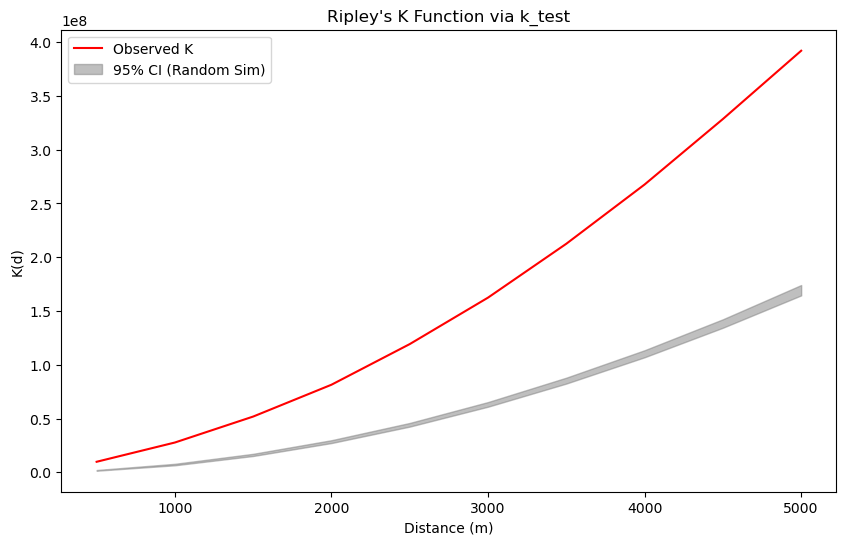

In [35]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import Point, Polygon
import pointpats
from pointpats import distance_statistics as ds

############################################
# 1. 加载数据
############################################
carjackings_path = "data/Chi_Carjackings/Chicago_Carjackings.shp"
community_areas_path = "data/Chi-CCA/Chicago_2020.shp"
carjacking_variables_path = "data/Chi_Carjackings/carjacking_variables.xlsx"

gdf_carjackings = gpd.read_file(carjackings_path)
gdf_community_areas = gpd.read_file(community_areas_path)
df_carjacking_vars = pd.read_excel(carjacking_variables_path)

############################################
# 2. 检查并统一CRS
############################################
print("Carjackings CRS:", gdf_carjackings.crs)
print("Community Areas CRS:", gdf_community_areas.crs)

# 如果CRS不一致，需要重投影。例如，劫车数据EPSG:3435，社区数据为地理坐标:
# 假设以EPSG:3435为统一坐标系：
if gdf_community_areas.crs != gdf_carjackings.crs:
    gdf_community_areas = gdf_community_areas.to_crs(gdf_carjackings.crs)

print("After reprojecting, Community Areas CRS:", gdf_community_areas.crs)

############################################
# 3. 提取事件点坐标并确保为float类型
############################################
carjackings_points = np.array([(geom.x, geom.y) for geom in gdf_carjackings.geometry], dtype=float)

############################################
# 4. 构建研究区域多边形（study_area_poly）
############################################
study_area_poly = unary_union(gdf_community_areas.geometry)
if study_area_poly.geom_type == 'MultiPolygon':
    # 选取面积最大的Polygon作为研究域
    largest_polygon = max(study_area_poly.geoms, key=lambda a: a.area)
    study_area_poly = largest_polygon

# 确保多边形坐标为float
# 提取Polygon坐标并重建Polygon以确保浮点类型
coords = np.array(study_area_poly.exterior.coords, dtype=float)
study_area_poly = Polygon(coords)

############################################
# 5. 定义距离序列与模拟次数，并确保为float类型
############################################
distance_support = np.arange(500, 5500, 500).astype(float)
iterations = 999

############################################
# 6. 使用k_test进行K函数分析
############################################
result = ds.k_test(
    coordinates=carjackings_points,
    support=distance_support,
    hull=study_area_poly,
    keep_simulations=True,
    n_simulations=iterations
)

# 查看result属性
print("Attributes of result:", dir(result))

# 提取结果
obs = result.statistic        # 观测K值数组
sims = result.simulations     # 模拟K值数组 (iterations x len(distance_support))
r = result.support            # 距离序列

# 计算95%置信区间
lower = np.percentile(sims, 2.5, axis=0)
upper = np.percentile(sims, 97.5, axis=0)

plt.figure(figsize=(10,6))
plt.plot(r, obs, color='red', label='Observed K')
plt.fill_between(r, lower, upper, color='gray', alpha=0.5, label='95% CI (Random Sim)')
plt.xlabel('Distance (m)')
plt.ylabel('K(d)')
plt.title("Ripley's K Function via k_test")
plt.legend()
plt.show()

In [38]:
# 确保 gdf_community_areas 中有 MEDINC 列
print("Columns in gdf_community_areas:", gdf_community_areas.columns)

# 检查MEDINC描述统计并计算中位数
print(gdf_community_areas['MEDINC'].describe())
median_income = gdf_community_areas['MEDINC'].median()
print("Median income for all communities:", median_income)

# 根据中位数划分income_group列
gdf_community_areas['income_group'] = gdf_community_areas['MEDINC'].apply(lambda x: 'low' if x < median_income else 'high')

# 再次确认
print("Check if income_group column is created:")
print(gdf_community_areas[['area_numbe','MEDINC','income_group']].head())


Columns in gdf_community_areas: Index(['area_num_1', 'area_numbe', 'community', 'shape_area', 'shape_len',
       'districtno', 'district', 'GEOID', 'GEOG', '2000_POP',
       ...
       'KOREAN', 'OTHASIAN', 'OTHER_EURO', 'OTHUNSPEC', '2000_WHITE',
       '2000_HISP', '2000_BLACK', '2000_ASIAN', '2000_OTHER', 'geometry'],
      dtype='object', length=217)
count        77.000000
mean      56199.935065
std       27028.194034
min       15396.000000
25%       34396.000000
50%       51689.000000
75%       70223.000000
max      125033.000000
Name: MEDINC, dtype: float64
Median income for all communities: 51689.0
Check if income_group column is created:
   area_numbe   MEDINC income_group
0        35.0  31856.0          low
1        36.0  32844.0          low
2        37.0  23148.0          low
3        38.0  33503.0          low
4        39.0  49114.0          low

In [39]:
gdf_carjackings_joined['area_numbe'] = gdf_carjackings_joined['area_numbe'].fillna(-1)

low_income_areas = gdf_community_areas[gdf_community_areas['income_group'] == 'low']['area_numbe'].tolist()
high_income_areas = gdf_community_areas[gdf_community_areas['income_group'] == 'high']['area_numbe'].tolist()

low_income_events = gdf_carjackings_joined[gdf_carjackings_joined['area_numbe'].isin(low_income_areas)]
high_income_events = gdf_carjackings_joined[gdf_carjackings_joined['area_numbe'].isin(high_income_areas)]

print("Number of low-income community events:", len(low_income_events))
print("Number of high-income community events:", len(high_income_events))

print("\nLow income events head:")
print(low_income_events.head())

print("\nHigh income events head:")
print(high_income_events.head())


Number of low-income community events: 964
Number of high-income community events: 446

Low income events head:
           ID Case _mber                    Date   IUCR  \
0  12243012.0   JD456735  12/11/2020 11:45:00 PM  326.0   
2  12012068.0   JD189121  03/18/2020 12:03:00 AM  326.0   
3  12012705.0   JD189547  03/18/2020 01:00:00 PM  326.0   
4  12013533.0   JD189766  03/18/2020 05:32:00 PM  325.0   
5  12012624.0   JD189695  03/18/2020 01:00:00 PM  326.0   

                       Descr_tion Locat_tion    Beat  District  Ward  \
0  AGGRAVATED VEHICULAR HIJACKING     STREET   723.0       7.0   6.0   
2  AGGRAVATED VEHICULAR HIJACKING     STREET  1114.0      11.0  28.0   
3  AGGRAVATED VEHICULAR HIJACKING     STREET  1114.0      11.0  28.0   
4             VEHICULAR HIJACKING     STREET   712.0       7.0  16.0   
5  AGGRAVATED VEHICULAR HIJACKING     STREET  1513.0      15.0  29.0   

   Commu_Area  ...  ARABIC  KOREAN  OTHASIAN  OTHER_EURO  OTHUNSPEC  \
0        68.0  ...     0.0   

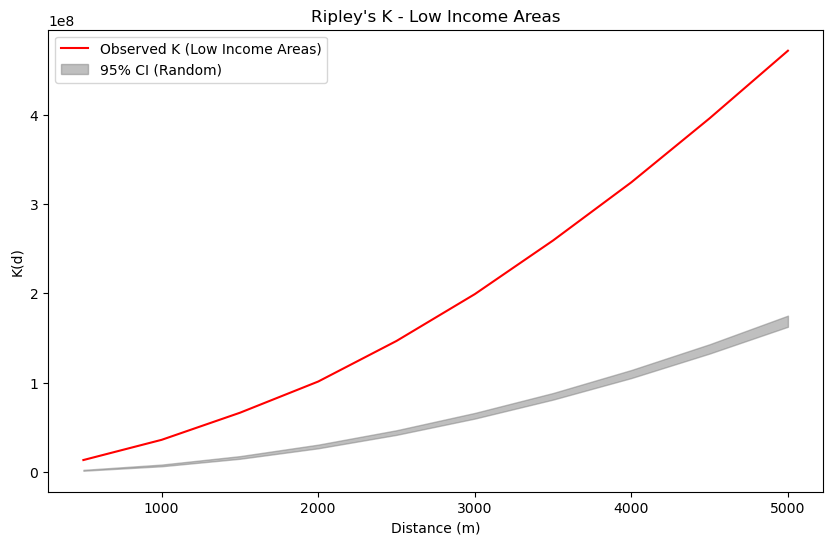

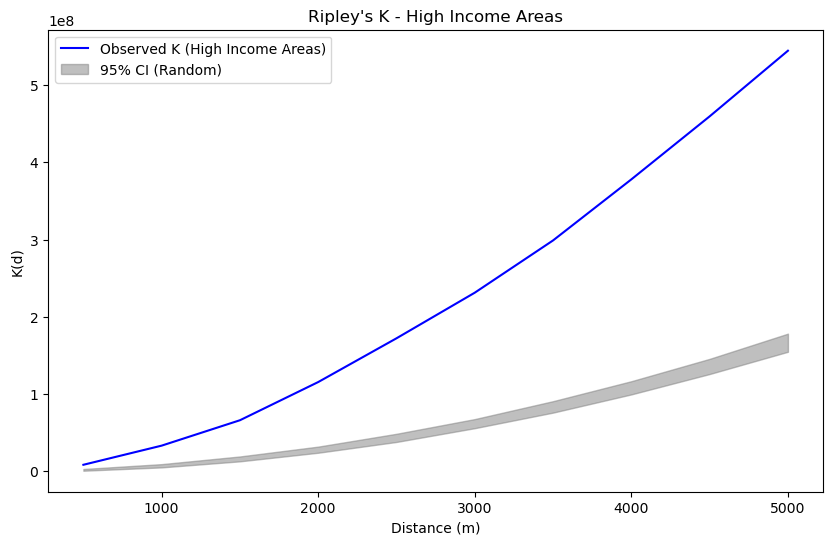

Low-income areas K-test results:
Attributes: ['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_field_defaults', '_fields', '_make', '_replace', 'count', 'index', 'pvalue', 'simulations', 'statistic', 'support']
Observations shape: (10,) Simulations shape: (999, 10)

High-income areas K-test results:
Attributes: ['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init_

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import Point, Polygon
from pointpats import distance_statistics as ds

# 首先从low_income_events和high_income_events中提取点坐标
low_points = np.array([(geom.x, geom.y) for geom in low_income_events.geometry], dtype=float)
high_points = np.array([(geom.x, geom.y) for geom in high_income_events.geometry], dtype=float)

# 使用与之前类似的距离序列和模拟次数
distance_support = np.arange(500, 5500, 500).astype(float)
iterations = 999

############################################
# 低收入社区事件 K函数分析
############################################
low_result = ds.k_test(
    coordinates=low_points,
    support=distance_support,
    hull=study_area_poly,  # 使用同一个研究区域，如有需要可只使用低收入社区的多边形集合
    keep_simulations=True,
    n_simulations=iterations
)

obs_low = low_result.statistic
sims_low = low_result.simulations
r_low = low_result.support
lower_low = np.percentile(sims_low, 2.5, axis=0)
upper_low = np.percentile(sims_low, 97.5, axis=0)

plt.figure(figsize=(10,6))
plt.plot(r_low, obs_low, color='red', label='Observed K (Low Income Areas)')
plt.fill_between(r_low, lower_low, upper_low, color='gray', alpha=0.5, label='95% CI (Random)')
plt.xlabel('Distance (m)')
plt.ylabel('K(d)')
plt.title("Ripley's K - Low Income Areas")
plt.legend()
plt.show()

############################################
# 高收入社区事件 K函数分析
############################################
high_result = ds.k_test(
    coordinates=high_points,
    support=distance_support,
    hull=study_area_poly, 
    keep_simulations=True,
    n_simulations=iterations
)

obs_high = high_result.statistic
sims_high = high_result.simulations
r_high = high_result.support
lower_high = np.percentile(sims_high, 2.5, axis=0)
upper_high = np.percentile(sims_high, 97.5, axis=0)

plt.figure(figsize=(10,6))
plt.plot(r_high, obs_high, color='blue', label='Observed K (High Income Areas)')
plt.fill_between(r_high, lower_high, upper_high, color='gray', alpha=0.5, label='95% CI (Random)')
plt.xlabel('Distance (m)')
plt.ylabel('K(d)')
plt.title("Ripley's K - High Income Areas")
plt.legend()
plt.show()

############################################
# 输出结果检查
############################################
print("Low-income areas K-test results:")
print("Attributes:", dir(low_result))
print("Observations shape:", obs_low.shape, "Simulations shape:", sims_low.shape)

print("\nHigh-income areas K-test results:")
print("Attributes:", dir(high_result))
print("Observations shape:", obs_high.shape, "Simulations shape:", sims_high.shape)


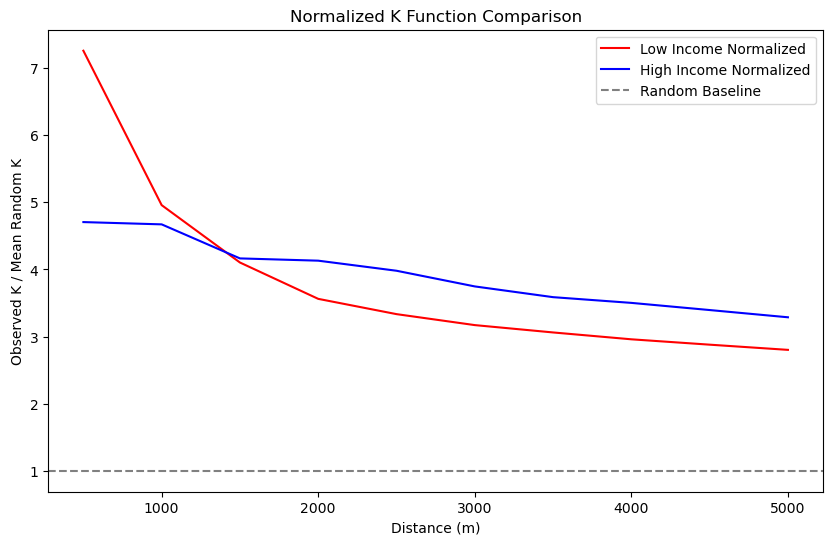

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 从low_result和high_result中获取数据
obs_low = low_result.statistic
sims_low = low_result.simulations
obs_high = high_result.statistic
sims_high = high_result.simulations
r = low_result.support  # 距离序列应当相同

# 计算模拟分布均值
mean_low = np.mean(sims_low, axis=0)
mean_high = np.mean(sims_high, axis=0)

# 归一化处理：观测值除以模拟均值
norm_low = obs_low / mean_low
norm_high = obs_high / mean_high

plt.figure(figsize=(10,6))
plt.plot(r, norm_low, color='red', label='Low Income Normalized')
plt.plot(r, norm_high, color='blue', label='High Income Normalized')
plt.axhline(y=1.0, color='gray', linestyle='--', label='Random Baseline')
plt.xlabel('Distance (m)')
plt.ylabel('Observed K / Mean Random K')
plt.title("Normalized K Function Comparison")
plt.legend()
plt.show()
